## Basic Data Preparation 

In [1]:
# import everything we need first
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [2]:
# read in data from the file
df = pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
#make the random capitalisations in some of the columns consistent
df.rename(index=str, columns={'gender':'Gender', 'NationalITy':'Nationality',
                               'raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},
                               inplace=True)

## View information of dataset

In [4]:
#dimensions of dataset
df.shape

(480, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 479
Data columns (total 17 columns):
Gender                      480 non-null object
Nationality                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
RaisedHands                 480 non-null int64
VisitedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 67.5+ KB


## Data visualisations

### Visualisation of the numerical variables

There are 4 numerical variables in the dataset, namely RaisedHands, VisitedResources, AnnouncementsView and Discussion. We will examine them using univariate and multivariate plots.

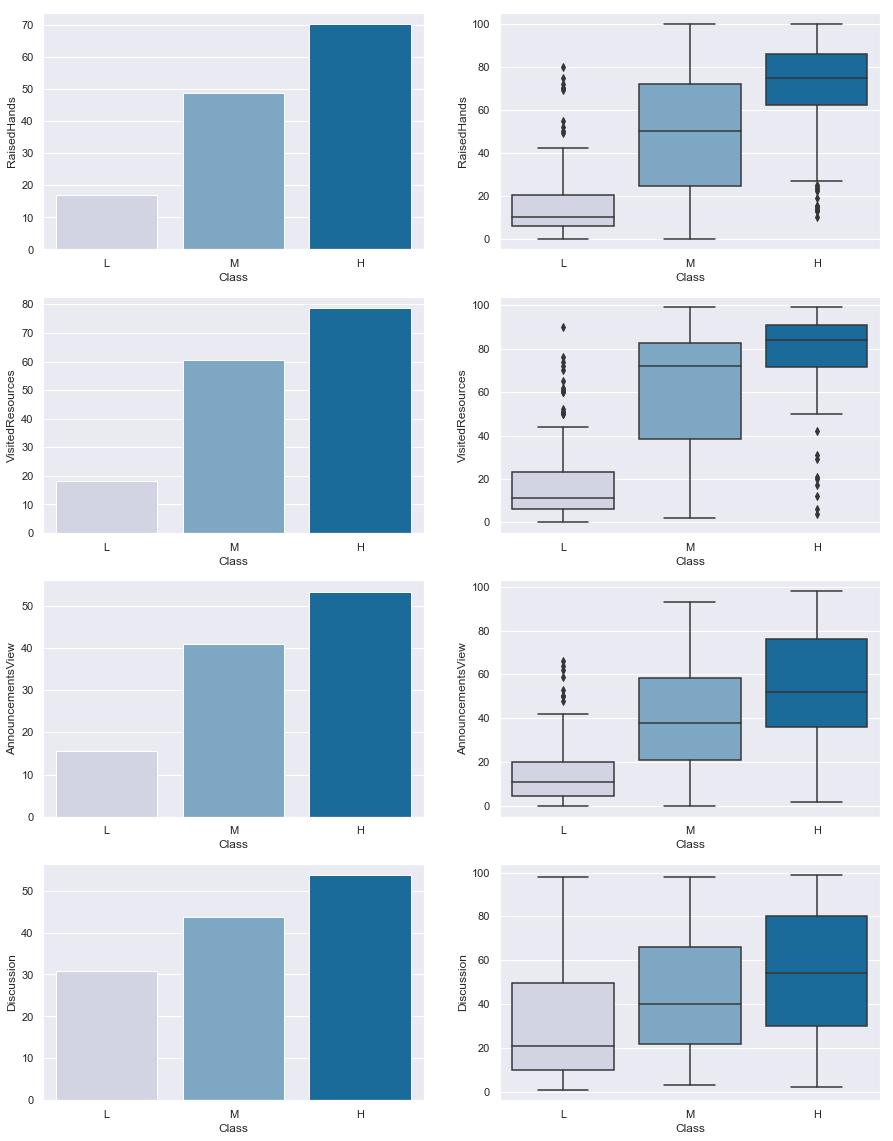

In [20]:
#using barplots and boxplots
fig, axarray  = plt.subplots(4,2,figsize=(15,20))
sns.barplot(x='Class', y='RaisedHands', data=df, ci=None, palette='PuBu', order=['L','M','H'], ax=axarray[0,0])
sns.boxplot(x='Class', y='RaisedHands', data=df, palette='PuBu', order=['L','M','H'], ax=axarray[0,1])
sns.barplot(x='Class', y='VisitedResources', data=df, ci=None, palette='PuBu', order=['L','M','H'], ax=axarray[1,0])
sns.boxplot(x='Class', y='VisitedResources', data=df, palette='PuBu', order=['L','M','H'], ax=axarray[1,1])
sns.barplot(x='Class', y='AnnouncementsView', data=df, ci=None, palette='PuBu', order=['L','M','H'], ax=axarray[2,0])
sns.boxplot(x='Class', y='AnnouncementsView', data=df, palette='PuBu', order=['L','M','H'], ax=axarray[2,1])
sns.barplot(x='Class', y='Discussion', data=df, ci=None, palette='PuBu', order=['L','M','H'], ax=axarray[3,0])
sns.boxplot(x='Class', y='Discussion', data=df, palette='PuBu', order=['L','M','H'], ax=axarray[3,1])

From the bar plots, there is a general trend that students with higher counts in the 4 identified features tend to perform better.
This is supported by the boxplots where a higher classification of performance shows a higher median. Also, the classes are more distinguishable between the lower-level and middle-level classes as the median lines all lie outside the overlap of the boxes.

However, it is observed that the variance of the 3 classes under the Discussion feature is larger. The greater variability and overlap of the classes in the data group suggests a weaker correlation with the dependent variable.


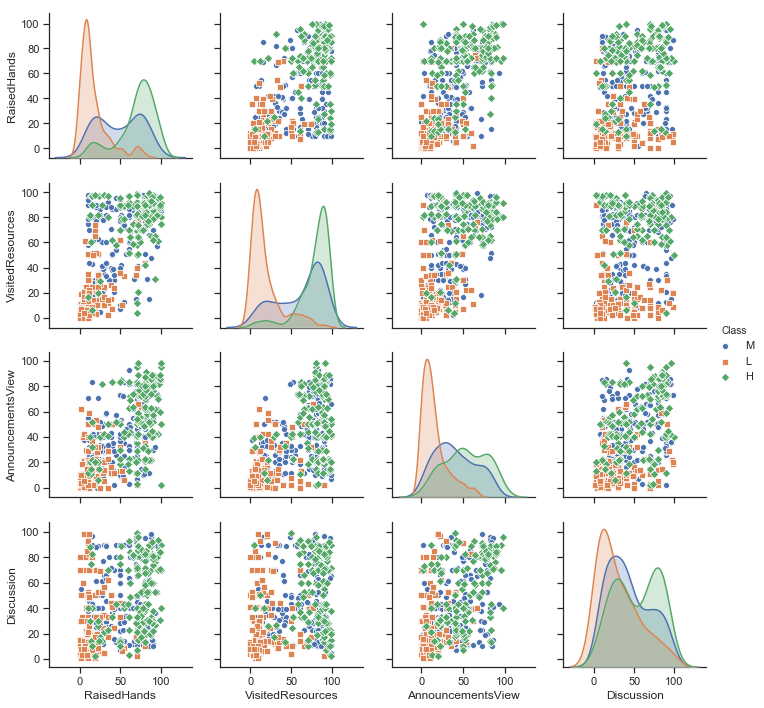

In [23]:
sns.set(style="ticks")
sns.pairplot(df, hue="Class", markers=["o", "s", "D"])

From the scatter plots, the feature "Discussion" is observed to be weakly correlated with any of the other 3 features.

The density plots in the diagonal axes show the univariate distributions of a single feature for multiple classes. From the univariate distributions of the feature (RaisedHands), there are two noticeable normal distributions. Intuitively, it seems that the continuous numeric feature can be transformed into discrete values, where these values can be thought of as categories or bins into which the raw, continuous numeric values are binned or grouped into. To explore deeper, we plot the histogram for the feature (RaisedHands). 


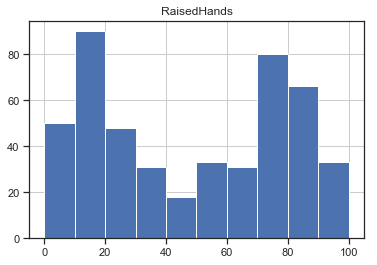

In [27]:
df.hist(column='RaisedHands')
plt.show()

Binning can be performed on the feature 'RaisedHands' in the data engineering phase to see if we are able to get a better model. From the histogram plot, fixed-width binning is possible with class intervals of 0<x<=50 and x>50 respectively.

In [28]:
#Encoding of dependent variable
dict = {
    'M': 1,
    'L': 0,
    'H': 2
}
df['Class'] = df['Class'].map(dict)

### Correlation Matrix Plot

Correlation shows how related the changes are between two variables. If the dataset contains highly correlated features, it can reduce the performance of certain machine learning algorithms like linear and logistic regression.

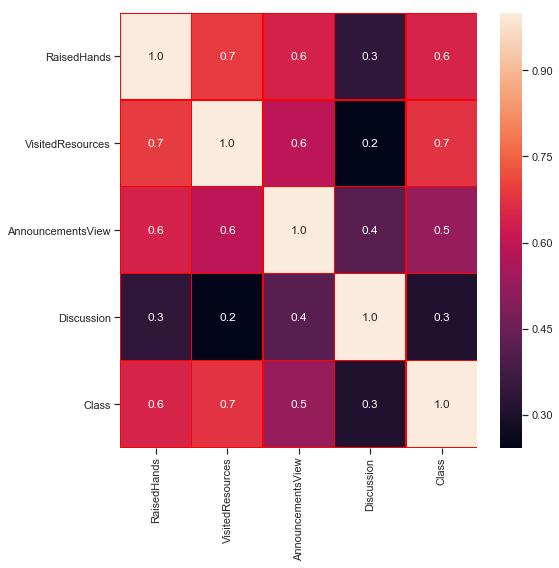

In [29]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="red",fmt=".1f",ax=ax)
plt.show()

In [30]:
df.corr()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion,Class
RaisedHands,1.000000,0.691572,0.643918,0.339386,0.646298
VisitedResources,0.691572,1.000000,0.594500,0.243292,0.677094
AnnouncementsView,0.643918,0.594500,1.000000,0.417290,0.527370
Discussion,0.339386,0.243292,0.417290,1.000000,0.308183
Class,0.646298,0.677094,0.527370,0.308183,1.000000


From the correlation table, we can see a high correlation between the features (RaisedHands and VisitedResources). This means that one of the features may be dropped. Since the feature (VisitedResources) has a higher correlation with the dependent variable (Class), we will drop the other feature (RaisedHands). This will be tested out in our Logistic regression modelling to evaluate the performance of this implementation